##Bayesian Inferential Approach

Here we introduce basic bayesian inferential approach with problem of learning about a population proportion.

Before taking data, one has beliefs about the value of the proportion and one models his or her beliefs in terms of a prior distribution.
This 'prior' can take different functional forms. After data is observed, one updates ones beliefs about the proportion by computing the posterior distribution.

One may also want to predict likely outcomes of a new sample taken from the population.

### LEARNING ABOUT PROPORTION OF HEAVY SLEEPERS

Sleeping habits of American college students. Doctors recommend 8 hours. What proportion of college students get at least 8 hours.  The opulation consists of all American college students and p represents the proportion who sleep (on a typical night during week) an average of 8 hours.

We want to know about the location of p which is unknown. In Bayesian terms, a person's beliefs about the uncertainty in this proportion can be represented by a probability distribution placed on this parameter. The distribution reflects the person's subjective prior opinion about plausible values of p.

Person reads in newspaper that most students only get 6 hours. Second article says based on sample of 100, 70 reported getting 5-6 hours sleep on weekdays, 28 reported 7-8 hours, and only 2 reported getting "healthy nine hours".

So: p, proportion that sleep < 8 hours is likely smaller than 50% or 0.5.  Best guess is that value of p is 0.3  But is plausible that p could be anywhere between 0 and 0.5.

We take a sample of 27 students, 11 say they had at least 8 hours the previous night. Now we want to predict proportion p if we draw a new sampleof 20.



### Using a Discrete Distrbution to Calculate Prior

One approach to get prior for p is to write down posible proportion values and to assign weights to the values. All these numbers represent best guesses

.05, .15, .25, .35, .45, .55, .65, .75, .85, .95 with weights 1, 5.2, 8, 7.2, 4.6, 2.1, 0.7, 0.1, 0, 0

####Convert to prior probabilities by dividing each weight by the sum.

In [7]:
library(LearnBayes)

# proportion p vector: THESE ARE THE APRIORI PROBABILITIES
p <- seq(0.05, 0.95, by = 0.1)
p

# corresponding weights BEST GUESSES
prior <- c(1, 5.2, 8, 7.2, 4.6, 2.1, 0.7, 0.1, 0, 0)
prior

# prior probabilities of each p proportion (NORMALIZE)
prior <- prior/sum(prior)
prior

[1] 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95

[1] 1.0 5.2 8.0 7.2 4.6 2.1 0.7 0.1 0.0 0.0

[1] 0.034602076 0.179930796 0.276816609 0.249134948 0.159169550 0.072664360
 [7] 0.024221453 0.003460208 0.000000000 0.000000000

#####Apriori Distribution

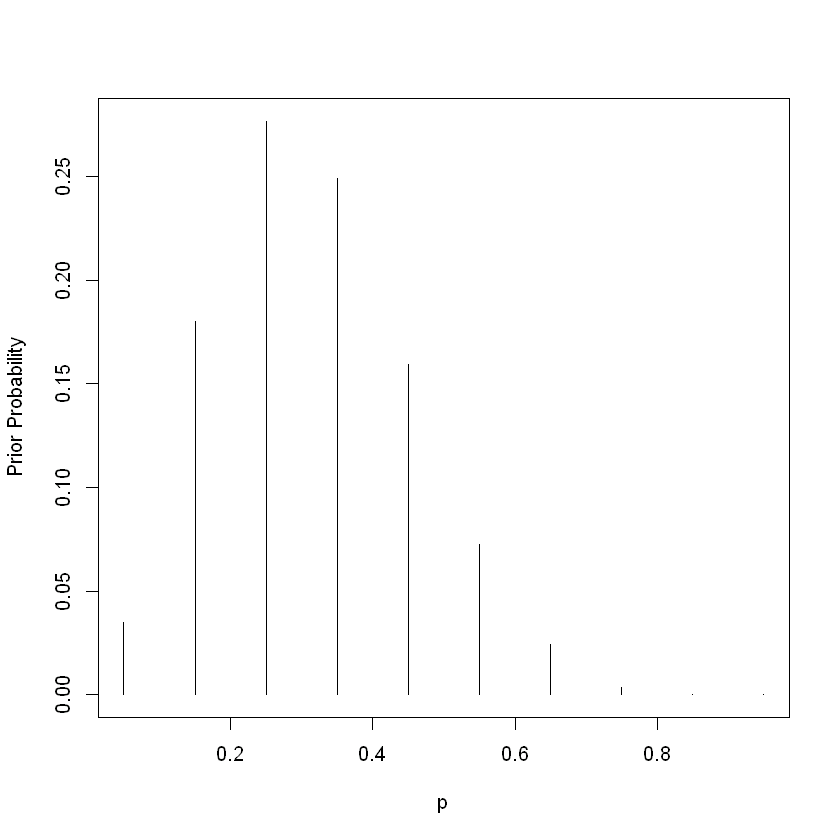

In [5]:
# here we graph this discrete prior distribution for porportions p:
plot(p, prior, type = "h", ylab="Prior Probability")

#####Posterior Distribution
We determine likelihood function for 11 of 27 students that sleep a sufficient number of hours (We took a sample of 27 students, 11 say they had at least 8 hours the previous night.)

In [13]:
# beta density parameters:
sampleData<-c(11, 16)

# Compute posterior densities (LearnBayes library)
post <-round(pdisc(p, prior, sampleData),2)
post

# show p, priors and posteriors (round to 2 decimals pllaces)
round(cbind(p, prior, post),2)

[1] 0.00 0.00 0.13 0.48 0.33 0.06 0.00 0.00 0.00 0.00

p,prior,post
0.05,0.03,0.00
0.15,0.18,0.00
0.25,0.28,0.13
0.35,0.25,0.48
0.45,0.16,0.33
0.55,0.07,0.06
0.65,0.02,0.00
0.75,0.00,0.00
0.85,0.00,0.00
0.95,0.00,0.00


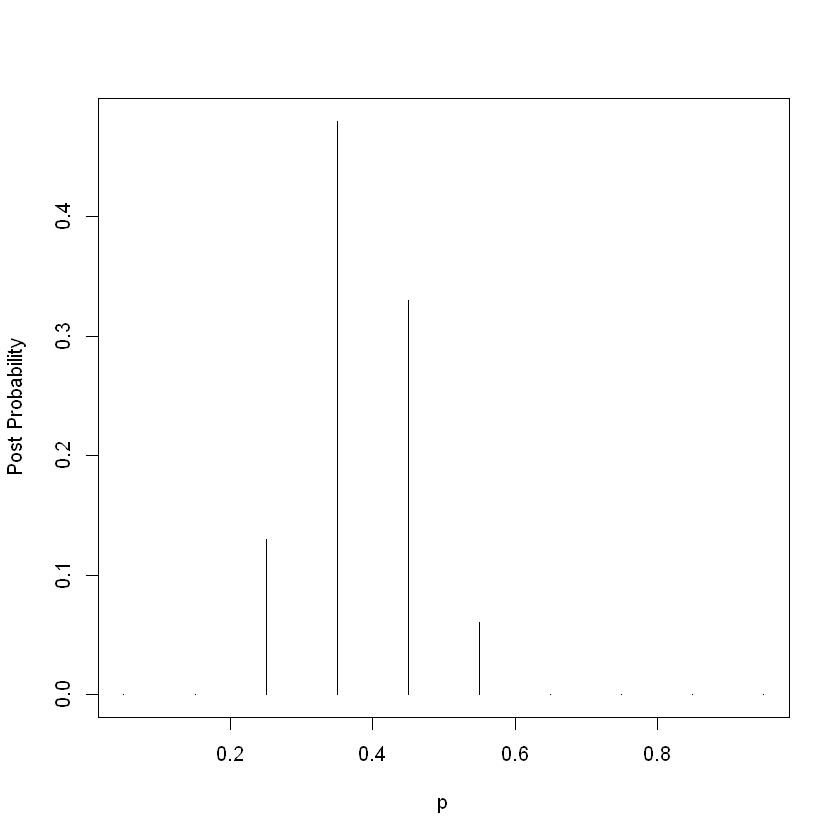

In [36]:
# here we graph this discrete prior distribution for porportions p:
plot(p, post, type = "h", ylab="Post Probability")

####Build A Dataframe


In [37]:
# add a new column up front,fill with "prior"
PRIOR=data.frame("prior",p,prior)

# names for prior column is "Type"
names(PRIOR)=c("Type","P","Probability")

# same with "posterior" for previous posterior numbers
POST=data.frame("posterior",p,post)

# names for posterior column is "Type"
names(POST)=c("Type","P","Probability")

# rowbind them (stack them up)
data=rbind(PRIOR,POST)

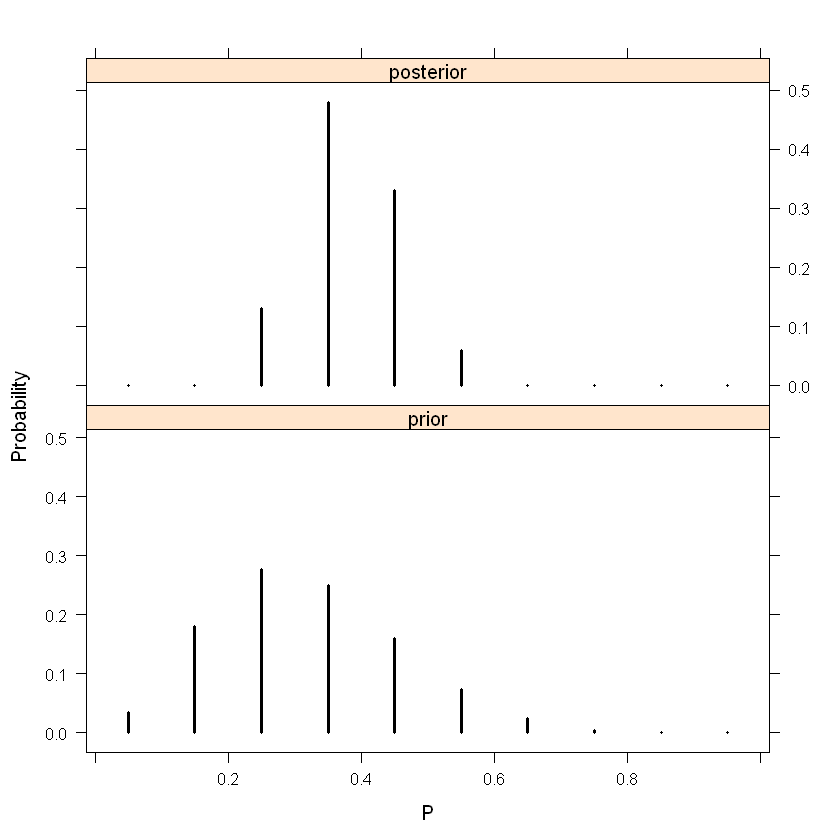

In [38]:
# Here we make a fancy plot
library(lattice)
# Do not need windows() command  t just opens a new window for
# the xyplot windows()
xyplot(Probability~P|Type,data=data,layout=c(1,2),type="h",lwd=3,col="black")

### Using a Continous Distrbution (Beta) to Calculate Prior

A proportion is a continuous parameter, so an alternative approach is to construct a density g(p) on the interval (0, 1) that represents the person's initial beliefs.

Suppose belief is that proportion is equally likely to be smaller or larger than 0.3. Also, she is 90% confident that p < 0.5.


In [39]:
quantile2=list(p=.9,x=.5)
quantile1=list(p=.5,x=.3)

ab=beta.select(quantile1,quantile2) #LearnBayes Library
ab

[1] 3.26 7.19

In [40]:
a = ab[1]
b = ab[2]
s = 11
f = 16

# We display the three densities: the prior
# density (g(p)), the likelihood function
# L(p), and the posterior density (g(p|data)
# for learning about the proportion p. 

# We see that (in this case) the posterior 
# density is acompromise between the
# initial prior beliefs and the info
# provided by the data.

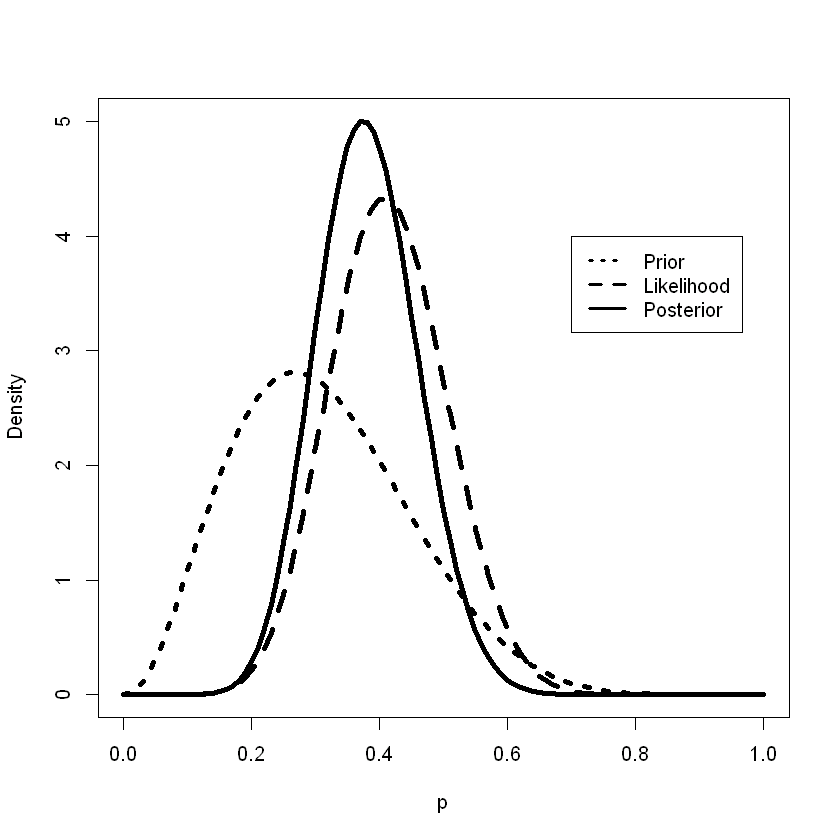

In [28]:
curve(dbeta(x,a+s,b+f), from=0, to=1,xlab="p",ylab="Density",lty=1,lwd=4)
curve(dbeta(x,s+1,f+1),add=TRUE,lty=2,lwd=4)
curve(dbeta(x,a,b),add=TRUE,lty=3,lwd=4)
legend(.7,4,c("Prior","Likelihood","Posterior"),lty=c(3,2,1),lwd=c(3,3,3))

In [ ]:
There are different ways of summarizing the beta posterior distribution to make inferences about the proportion  of heavy sleepers p.
The beta cum density function (cdf) and inverse cdf functions pbeta and qbeta are useful in computing probabilities and creating interval 
estimates for p. Is it likely that the proportion of heavy sleepers > 0.5? 
    
We compute the posterior prob P(p >= .5|data) 

In [43]:
1 - pbeta(0.5, a + s, b + f)

[1] 0.0690226

In [ ]:
It is small so it is unlikely that more than half of the students are heavy sleepers.  We can find a 90% interval estimate for p by computing the 5th and 95th percentiles of the beta density:

In [45]:
round(qbeta(c(0.05, 0.95), a + s, b + f),3)

# So a 90% posterior credible interval for the proportion p is (0.256, 0.513)

[1] 0.256 0.513

### Using Simulation to Calculate Post

Can also use simulation to summarize a posterior density....we simulate a large number of values from the beta posterior density and summarize the simulated output.

We use pseudo-random beta generator rbeta() to simulate 1000 random proportion values from the beta (a+s, b+f)
posterior with:

In [54]:
set.seed(1234)
ps = rbeta(1000, a + s, b + f)
ps

[1] 0.2737392 0.4060386 0.4870664 0.4202697 0.4276298 0.3300043 0.3324743
   [8] 0.3309084 0.3021664 0.3385739 0.2925108 0.3122497 0.3865732 0.4735181
  [15] 0.3709285 0.3356037 0.3002854 0.3068579 0.3928812 0.3373887 0.3417925
  [22] 0.4231719 0.3195340 0.2517445 0.4342939 0.2902504 0.3794176 0.2980820
  [29] 0.4890389 0.3387144 0.3181482 0.3364602 0.2350569 0.2773063 0.2615626
  [36] 0.3546536 0.3395659 0.5293248 0.2862178 0.3052447 0.3558581 0.2928725
  [43] 0.2951787 0.2827421 0.2696664 0.3344777 0.3368473 0.2186313 0.3293594
  [50] 0.2826007 0.2910285 0.3663111 0.4331525 0.5540678 0.3125060 0.5487324
  [57] 0.2781921 0.4423540 0.3776616 0.3216561 0.3800926 0.2799241 0.5195074
  [64] 0.5149815 0.4115364 0.3813928 0.3404819 0.3482974 0.4415300 0.3671010
  [71] 0.3169009 0.4042643 0.3526489 0.3649400 0.3656303 0.2587017 0.3652944
  [78] 0.4620170 0.4464475 0.4318818 0.3451148 0.3637183 0.2748740 0.3760178
  [85] 0.4039809 0.5615648 0.4780257 0.3369586 0.4133237 0.2802846 0.4649318
  [92] 0.4749528 0.4188843 0.3387912 0.3867117 0.3363530 0.3958795 0.3016130
  [99] 0.3959888 0.4132691 0.3761118 0.3633343 0.3234667 0.2825218 0.4619175
 [106] 0.3827821 0.4600388 0.2703652 0.3960656 0.4440039 0.3784205 0.3637361
 [113] 0.3117499 0.4517812 0.3879824 0.3250209 0.2457564 0.3246082 0.4013165
 [120] 0.4793411 0.4037550 0.2769153 0.4435603 0.3483564 0.3527317 0.4693309
 [127] 0.3257721 0.3511548 0.4403798 0.3710933 0.4283729 0.4174409 0.5559963
 [134] 0.4058963 0.4276507 0.4125737 0.3473555 0.3895713 0.5529079 0.3917607
 [141] 0.5188306 0.3599157 0.2875869 0.3039653 0.3462226 0.3059555 0.3576198
 [148] 0.3440879 0.3644742 0.4181771 0.4391901 0.5579722 0.3746316 0.3523161
 [155] 0.5319464 0.5613526 0.3846606 0.3512761 0.5247019 0.3068215 0.2812618
 [162] 0.4021194 0.3777959 0.3718619 0.4188222 0.4685144 0.5988400 0.4965022
 [169] 0.3358033 0.4471068 0.3631148 0.3332265 0.3110655 0.4258752 0.4271135
 [176] 0.4387539 0.2954117 0.3954838 0.1933468 0.4256267 0.4463633 0.3975731
 [183] 0.4467609 0.4092219 0.4527928 0.5795875 0.4901548 0.3837083 0.2821004
 [190] 0.4192193 0.3453342 0.5347033 0.2370946 0.3439708 0.4195940 0.3672483
 [197] 0.3272427 0.3537352 0.4396742 0.4667098 0.4427142 0.4969972 0.4069923
 [204] 0.3225247 0.4444278 0.3203624 0.3976626 0.3520034 0.3563797 0.2982998
 [211] 0.3913145 0.4099192 0.2854188 0.3581283 0.3834253 0.4362039 0.3860929
 [218] 0.4187777 0.2836008 0.4478095 0.4485858 0.4036535 0.5182545 0.4179322
 [225] 0.4048286 0.4051692 0.4210118 0.4843951 0.4224656 0.4430112 0.2801255
 [232] 0.3479480 0.5326759 0.2722139 0.4042464 0.4179828 0.4752619 0.3498493
 [239] 0.3951162 0.2226079 0.4117351 0.3219264 0.3595603 0.4160875 0.4433477
 [246] 0.3537446 0.5772506 0.4437441 0.4723607 0.3232868 0.4577168 0.3802211
 [253] 0.4099091 0.4241834 0.3188950 0.4582377 0.3091379 0.4099413 0.3060289
 [260] 0.3589322 0.2421064 0.3923671 0.4762961 0.3973657 0.2223315 0.3259777
 [267] 0.2766362 0.3482816 0.4131431 0.4099188 0.3295457 0.2965376 0.3647949
 [274] 0.4789213 0.3828957 0.3234704 0.3361865 0.5498076 0.3412293 0.4530689
 [281] 0.5320336 0.4216529 0.3434463 0.3771931 0.3372487 0.5031597 0.3674419
 [288] 0.3311580 0.3236386 0.3937042 0.3829462 0.3361797 0.3834747 0.3175188
 [295] 0.4868648 0.2965905 0.4917253 0.3234691 0.4074344 0.4670807 0.3349244
 [302] 0.4323136 0.3729136 0.3567874 0.3617255 0.3085756 0.3759406 0.4109445
 [309] 0.4730734 0.4936774 0.3898342 0.4959916 0.3133096 0.1689252 0.3390577
 [316] 0.3351780 0.4330956 0.3115847 0.3606722 0.2389424 0.4316415 0.5861661
 [323] 0.3032289 0.3707264 0.5940129 0.4707870 0.5891347 0.3803051 0.3672019
 [330] 0.3357247 0.5275149 0.2665895 0.4088151 0.3766286 0.3270772 0.2461250
 [337] 0.4018993 0.3772246 0.3066847 0.3927177 0.3563074 0.3208523 0.4271271
 [344] 0.3513637 0.3294907 0.5298952 0.4607619 0.4759807 0.4096025 0.2463301
 [351] 0.3994112 0.5476343 0.3117989 0.4890574 0.4298208 0.4557444 0.4229341
 [358] 0.4307981 0.3820885 0.2998144 0.2719500 0.3840223 0.3434752 0.3013375

And then display the proportion as a histogram of the simulated values. We estimate the probability that the proportion is larger than 0.5 using the proportion of simulated values in the range of the simulated sample from the beta posterior distribution of p:

[1] 0.067

5%       95% 
0.2627529 0.5196811

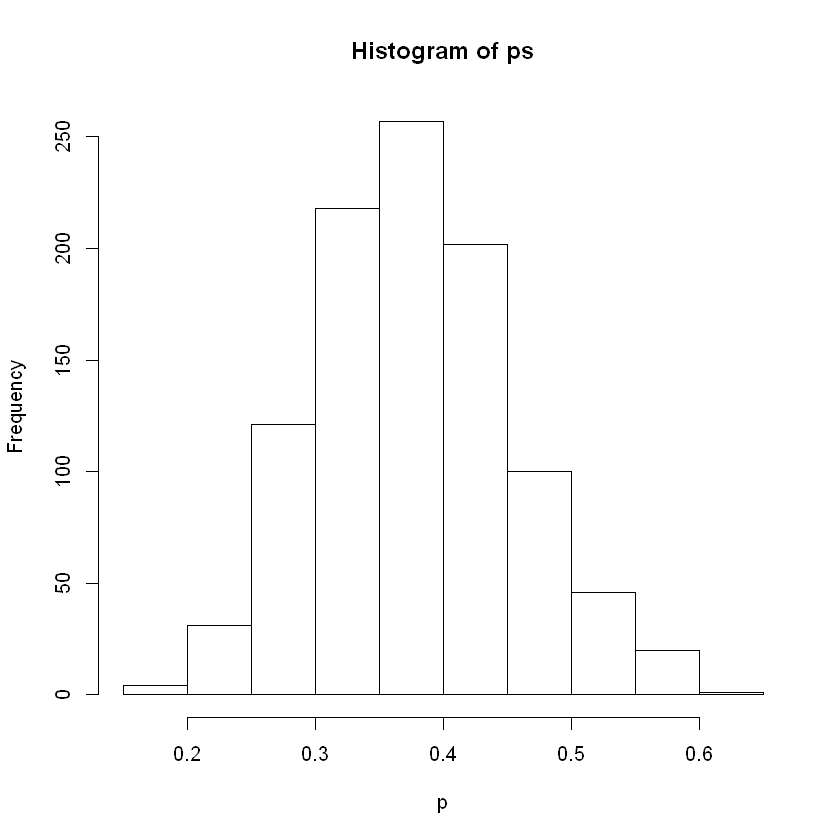

In [58]:
hist(ps,xlab="p")
sum(ps >= 0.5)/1000  ##COMPARE THIS TO NUMBER PREVIOUSLY CALCULATE

# Here we get 90% interval estimate from
# the 5th and 95th sample quantiles:
quantile(ps, c(0.05, 0.95))

# Note these summaries of the posterior density for p based on simulation are # very close to the exact values based on the calculations from the beta distribution:

### Using Histogram to Calculate Prior

There are computational advantages to using a beta prior, can also perform posterior computations for any choice of prior.

BRUTE FORCE TECHNIQUE

We illustrate for a 'histogram' prior that may better reflect the person's prior opinion about proportion p.

They state prior beliefs about proportion of heavy sleepers by dividing the range of p into ten subintervals: (0, .1), (.1, .2) . . . (.9, 1) and then assigning probabilities to these intervals.

Person assigns weights: 1, 5.2, 8, 7.2, 4.6, 2.1, 0.7, 0.1, 0, 0 We view this as a continuous version of the discrete prior used earlier

[1] 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95

[1] 1.0 5.2 8.0 7.2 4.6 2.1 0.7 0.1 0.0 0.0

[1] 0.034602076 0.179930796 0.276816609 0.249134948 0.159169550 0.072664360
 [7] 0.024221453 0.003460208 0.000000000 0.000000000

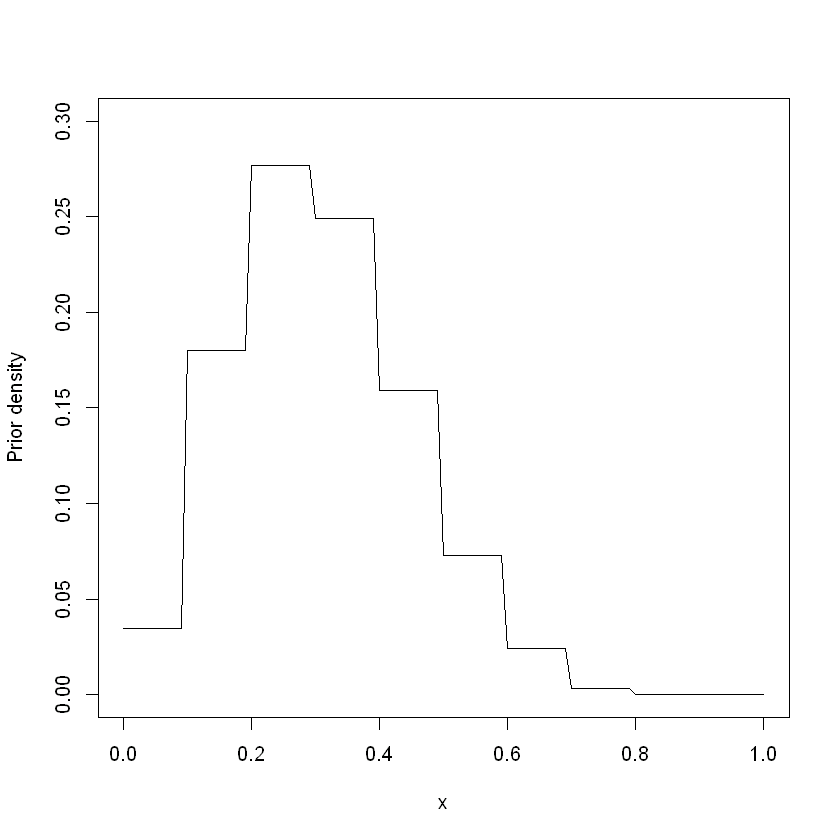

In [62]:
# So histogram prior has midpoints of intervals:
midpt = seq(0.05, 0.95, by = 0.1)
midpt

# the associate prior weights:
prior = c(1, 5.2, 8, 7.2, 4.6, 2.1, 0.7, 0.1, 0, 0)
prior

# We convert prior weights to probs by dividing each weight by the sum:
prior = prior/sum(prior)
prior

# We graph with curve() and with histprior() from LearnBayes package to yield a histogram prior for proportion p:
curve(histprior(x,midpt,prior), from=0, to=1,ylab="Prior density",ylim=c(0,.3))

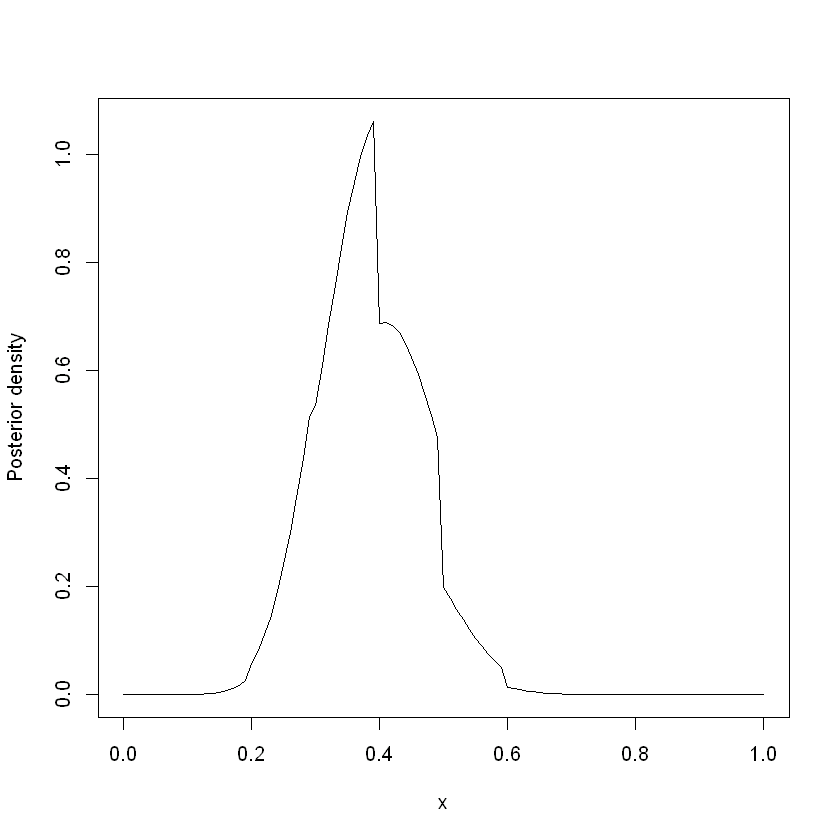

In [63]:
# from previously:
s = 11
f = 16
curve(histprior(x,midpt,prior) * dbeta(x,s+1,f+1), from=0, to=1, ylab="Posterior density")

In [67]:
# To obtain a simulated sample from posterior density we construct an equally spaced grid of values of proportion p and compute the product of the prior and the likelihood on this grid. Then we convert the products on the grid to probabilities:
p = seq(0, 1, length=500)
post = histprior(p, midpt, prior)*dbeta(p, s+1, f+1)
post = post/sum(post)

# Here we take a sample with replacement
# from the grid:
ps = sample(p, replace = TRUE, prob = post)

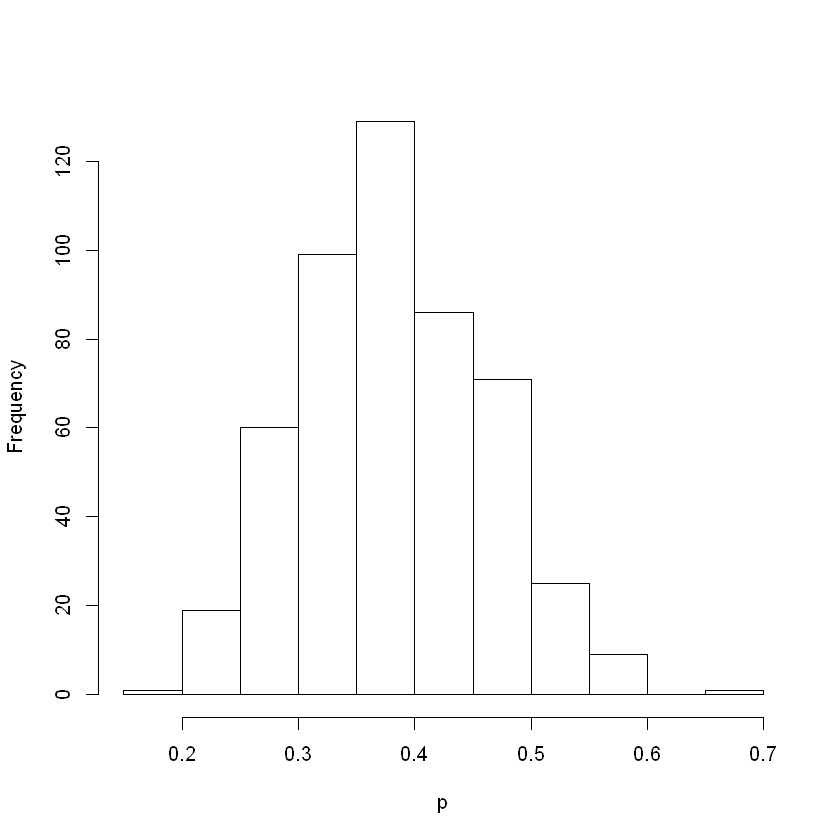

In [66]:
hist(ps, xlab="p", main="")

## Prediction


[1] 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95

,pred
0.00,0.02
1.000,0.044
2.000,0.069
3.000,0.092
4.000,0.106
5.000,0.112
6.00,0.11
7.000,0.102
8.000,0.089
9.000,0.074


y
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17 
 17  43  67 102  98 111 116 100  92  83  60  36  33  17  13   6   4   2 

$prob
   11 
0.908 

$set
 1  2  3  4  5  6  7  8  9 10 11 
 1  2  3  4  5  6  7  8  9 10 11

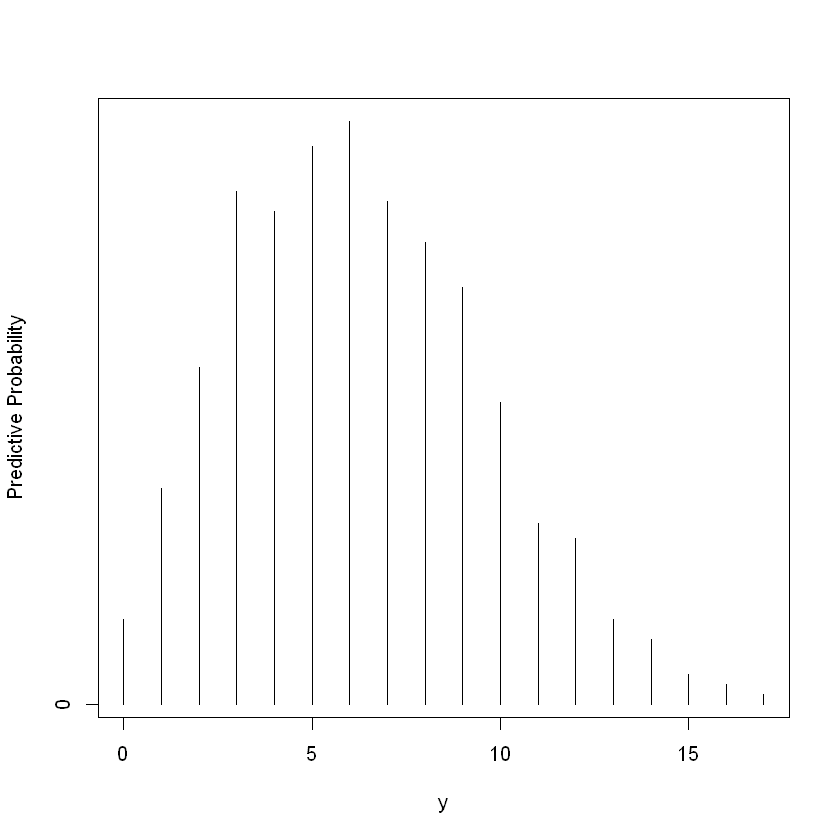

In [72]:
# Suppose someone wants to predict the number of heavy sleepers y-tilde in a future sample of m=20 students.
# pdiscp() computes the predictive probabilities when p is given a discrete distribution.  
# Like before, p is a vector of proportion values and prior is a vector of current probabilities.
# Other arguments are future sample size m, vector ys of number of successes of interest.
# Output is a vector of the corresponding predictive probabilities

p=seq(0.05, 0.95, by=.1);p
prior = c(1, 5.2, 8, 7.2, 4.6, 2.1, 0.7, 0.1, 0, 0)
prior=prior/sum(prior)

m=20; 
ys=0:20
pred=pdiscp(p, prior, m, ys)

# predictive probabilities: we see most likely number of successes in future sample is y-tilde = 5 and y-tilde = 6
round(cbind(0:20,pred),3)

# We illustrate this computation using the beta(3.26, 7.19) used before to reflect the person's beliefs about the proportion of heavy sleepers:
ab=c(3.26, 7.19)
m=20
ys=0:20

# This is the predictive density:
pred=pbetap(ab, m, ys)

# Note one can always compute a predictive density for any prior with simulation.

# To get y-tilde we first simulate p-star from g(p) and then simulate y-tilde from the binomial distribution

# Here we do it for beta(3.26, 7.19) prior. We simulate 1000 draws from the prior and put the simulated values in p:
p=rbeta(1000,3.26, 7.19)

# Now we simulate values for y-tilde for these random p's using the rbinom() function
y = rbinom(1000, 20, p)

# We tabulate the distinct values:
table(y)

# We save these frequencies and then convert to probabilities by dividing each freq by sum and use plot() to graph predictive distribution
freq=table(y)
ys=as.integer(names(freq))
predprob=freq/sum(freq)

# Predictive probabilities of the number of sleepers y-tilde in a future sample of size 20 when proportion is assigned a beta (3.26, 7.19) prior:
plot(ys,predprob,type="h",xlab="y", ylab="Predictive Probability")

# Now we want to summarize this discrete predictive distribution by an interval that covers at least 90% of the prob with discint()
# Vector of ys contain values of y-tilde and predprob contains associated probs from table output.

# Matrix dist contain this prob dist
dist=cbind(ys,predprob)

# discint() has inputs matrix dist and a given coverage prob covprob:
covprob=.9

# Output is a list where component 'set' gives the credible set and 'prob' gives the exact coverage probability

# So prob y-tilde falls in interval {1,2,3,4,5,6,7,8,9,10,11} is 91.1%
discint(dist,covprob)

# OR: if y-tilde/20 is the proportion of  heavy sleepers in the future sample, the probability that this sample proportion is in this interval is 91.1%. Note that this interval is much wider than 91.1% probability interval for the population proportion p.

# When predicting a future sample proportion there are two sources of uncertainty:
# uncertainty in the value of p
# AND
# binomial uncertainty in the value of y-tilde so the predictive interval is longer than the population interval
